# Task 1

1. Importing necessary python libraries to implement the project.
2. Importing the adult dataset from ucimlrepo

In [1]:
#importing major python libraries required for this project
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#importing the adult dataset from ucimlrepo
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 

# Task 2

Taking a quick look at the data structure(X)

In [3]:
#looking at the first 5 instances in the X dataframe.
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [4]:
#looking at major information about the columns of dataframe X
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [5]:
#looking at the major features of columns containing numerical values in X
X.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
#printing the shape of dataframe X
X.shape

(48842, 14)

## Task 2.1

Plotting a histogram of the data(X)

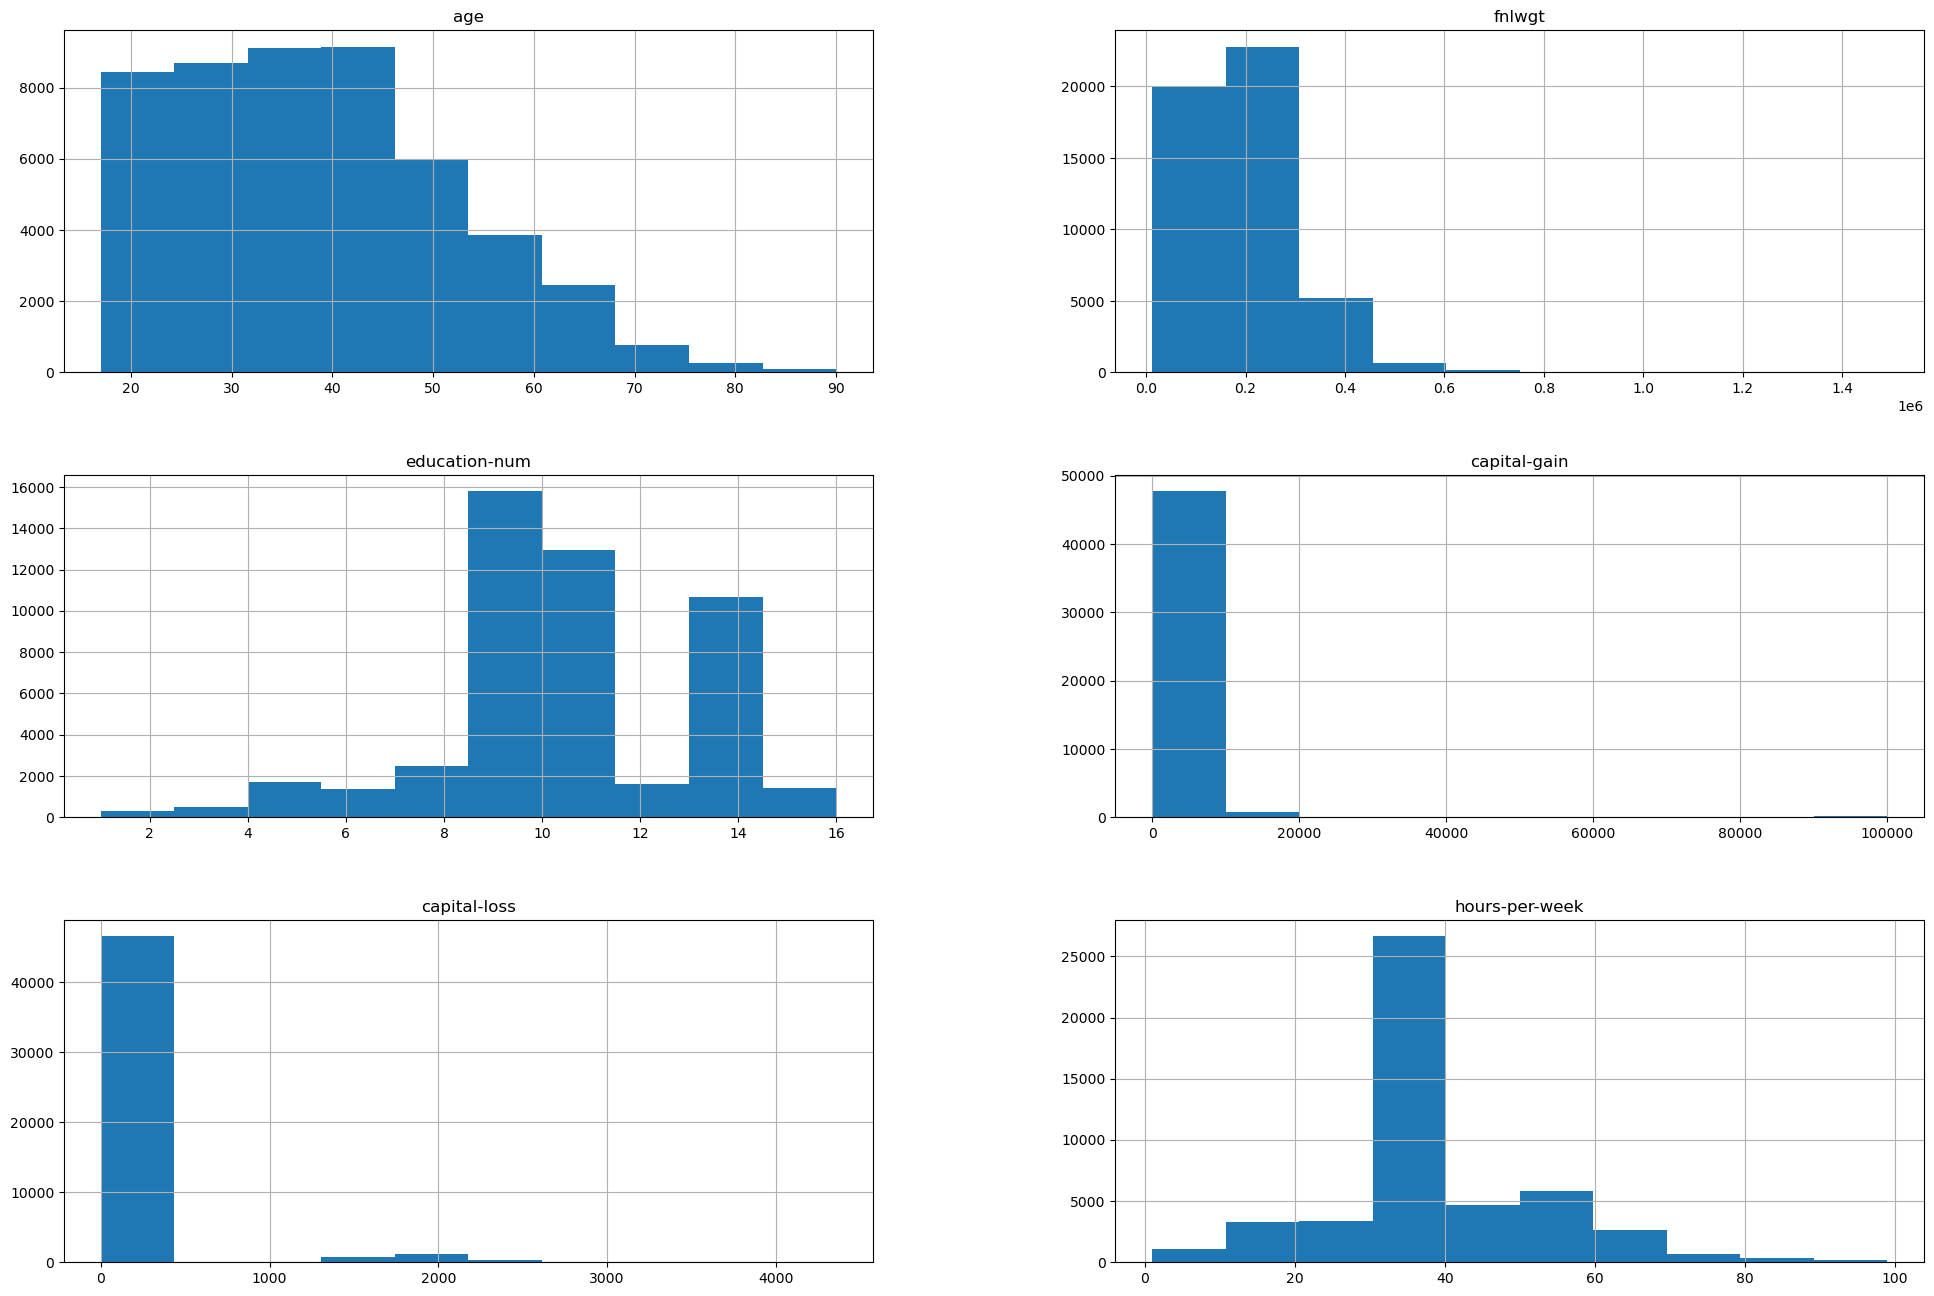

In [7]:
#plotting a histogram of all numerical features in X
X.hist(figsize=(24, 16))
plt.show()

# Task 3

Checking for the number of missing values '?' in X

In [8]:
#Checking for the number of missing values '?' in X
(X == '?').sum() 

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
dtype: int64

# Task 4

1. Replacing all '?' values in X with null(nan).
2. Running a X.info() to see the non-null count.

In [9]:
# Replacing all '?' values in X with null(nan).
X = X.replace('?', np.nan)

In [10]:
# A X.info() to see the non-null count for all features(columns) in X
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


# Task 5

Creating and applying a preprocessing pipeline to:
1. Fill in the missing numerical values with the mean using a SimpleImputer.
2. Scale the numerical columns using StandardScaler (but not the target).
3. Fill in the missing categorical values with the most_frequent value using SimpleImputer.
4. Encode the categorical columns using OneHotEncoder (but not the target).

In [11]:
#importing main functions used for pipelining
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [12]:
# Create the cat and num columns
# Get a list of column names from the 'X' DataFrame that are of numerical data types.
# Get a list of column names from the 'X' DataFrame that are not of numerical data types.

num_cols = X.select_dtypes(include='number').columns.to_list()
cat_cols = X.select_dtypes(exclude='number').columns.to_list()


# Create pipelines for numeric and categorical columns
num_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(sparse_output=False))

# Use ColumnTransformer to set the estimators and transformations

preprocessing = ColumnTransformer([('num', num_pipeline, num_cols),
                                   ('cat', cat_pipeline, cat_cols)],
                                    remainder='passthrough'
                                 )

In [13]:
#displaying the pipeline
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['age', 'fnlwgt', 'education-num',
                                  'capital-gain', 'capital-loss',
                                  'hours-per-week']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(sparse_output=False))]),
                                 ['workclass', 'education', 'marital-status',
                                  'occupation', 'relationship', 'race', 'sex',
                                  'native-country'])])

In [14]:
# Applying the preprocessing pipeline on the dataframe X
X_prepared = preprocessing.fit_transform(X)


# Scikit-learn strips the column headers, so just add them back on afterward.
feature_names=preprocessing.get_feature_names_out()
X_prepared = pd.DataFrame(data=X_prepared, columns=feature_names)

#printing the shape of the newly prepared dataframe
X_prepared.shape

(48842, 105)

# Task 6

Check the target value_counts.

In [15]:
#Checking the target, ie, y's value_counts
y.value_counts()

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

# Task 7

Clean the data in the target.

In [16]:
#cleaning data in the target, ie, y by:

#1. replacing all instances of <=50K. in y by <=50K
y = y.replace('<=50K.', '<=50K')

#2. replacing all instances of >50K. in y by >50K
y = y.replace('>50K.', '>50K')

In [17]:
#displaying the new value_counts for y, after the data cleaning
y.value_counts()

income
<=50K     37155
>50K      11687
Name: count, dtype: int64

# Task 8

Splitting the data from the dataframes into a 80% training set, and 20% testing set.

In [18]:
from sklearn.model_selection import train_test_split

#assining the new processed and cleaned values from X_prepared to dataframe X
X = X_prepared


#spitting the X and y dataframes to X_train, X_test, y_train, and y_test respectively and then outputting their shapes.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=57)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(39073, 105) (39073, 1) (9769, 105) (9769, 1)


# Task 9

Training a svm model (svc) to predict if the income of the adult exceeds 50K, using the training set.

In [19]:
#importing required libraries
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay


#creating a svm model using poly kernel, C=0.1, and gamma=1
model_svm = SVC(kernel='poly', C=0.1, gamma=1) 

#training the model on the training set
model_svm.fit(X_train.iloc[:10000], y_train.iloc[:10000].values.ravel())

SVC(C=0.1, gamma=1, kernel='poly')

## Task 9.1

Testing model on the X_Test, and reporting the classification_report on the y_test and y_predict.

In [20]:
#Testing model on the test set
y_predict=model_svm.predict(X_test)


#Priniting the classification_report on y_test and y_predict
print(f'classification_report for C = 1')
print (classification_report(y_test, y_predict))

classification_report for C = 1
              precision    recall  f1-score   support

       <=50K       0.88      0.89      0.88      7434
        >50K       0.64      0.61      0.62      2335

    accuracy                           0.82      9769
   macro avg       0.76      0.75      0.75      9769
weighted avg       0.82      0.82      0.82      9769



## Task 9.2

Printing the confusion matrix based on the model's prediction.

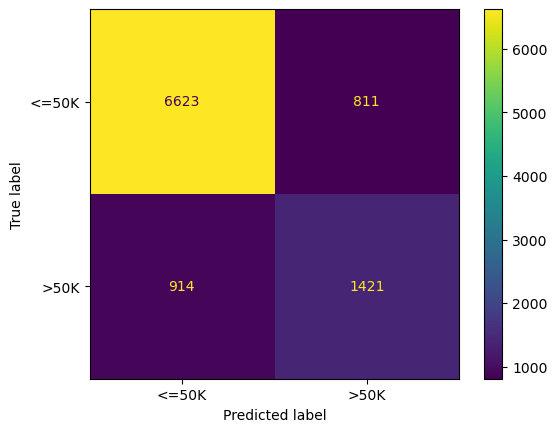

In [21]:
#Printing the confusion matrix using y_test and y_predict.
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

# Task 10

Use GridSearchCV to find the best value of kernel, gamma, and C.

## Task 10.1

Splitting the dataset into 60% training, 20% validation, and 20% testing.

In [22]:
#Splitting X and y into X_train, X_validation_test, y_train, and y_validation_test dataframes respectively, where the size of the training set is 60% of the size and the validation_test is 40%
X_train, X_validation_test, y_train, y_validation_test = train_test_split(X_prepared, y, test_size=0.4, random_state=42)


#Splitting X_validation_test and y_validation_test into X_validation, X_test, y_validation, and y_test dataframes respectively, where the size of the testing set is 50% of the validation_test set and thus 20% of the whole set, and the same applies for the validation set.
X_validation, X_test, y_validation, y_test = train_test_split(X_validation_test, y_validation_test, test_size=0.5, random_state=42)


#printing the shapes of all the newly created dataframes that constitue the training set, the testing set, and the validation set.
print(X_train.shape, y_train.shape, X_validation.shape, y_validation.shape, X_test.shape, y_test.shape)

(29305, 105) (29305, 1) (9768, 105) (9768, 1) (9769, 105) (9769, 1)


## Task 10.2

Finding the best hyperparameters for the kernel.

In [23]:
# code author luisguiserrano 

from sklearn.model_selection import GridSearchCV

#passing various possible values for hyperparameters C and gamma that would be used for fine-tuning them
svm_parameters = {'kernel': ['rbf'],
                  'C': [0.01, 0.1, 1 , 10],
                  'gamma': [0.01, 1, 10]
                }
svm = SVC()

#using GridSearchCV to find the best value for hyperparameters for C and gamma from the ones we passed before
svm_gs = GridSearchCV(estimator = svm,
                      param_grid = svm_parameters)
svm_gs.fit(X_train.iloc[:10000], y_train.iloc[:10000].values.ravel())

svm_winner = svm_gs.best_estimator_


#evaluating the accuracy of our model with the fine-tuned hyperparameters
svm_winner.score(X_validation, y_validation)

0.8472563472563472

In [24]:
#checking the values of the fine-tuned hyperparameters
svm_winner

SVC(C=10, gamma=0.01)